# EDA

In [1]:
import pandas as pd

# Load the datasets
contract_path = '/datasets/contract.csv'
internet_path = '/datasets/internet.csv'
phone_path = '/datasets/phone.csv'
personal_path = '/datasets/personal.csv'

contract = pd.read_csv(contract_path)
internet = pd.read_csv(internet_path)
phone = pd.read_csv(phone_path)
personal = pd.read_csv(personal_path)

# Display the first few rows and basic info of each dataset
(contract.head(), contract.info(), 
 internet.head(), internet.info(),
 phone.head(), phone.info(), 
 personal.head(), personal.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  obje

(   customerID   BeginDate              EndDate            Type  \
 0  7590-VHVEG  2020-01-01                   No  Month-to-month   
 1  5575-GNVDE  2017-04-01                   No        One year   
 2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
 3  7795-CFOCW  2016-05-01                   No        One year   
 4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   
 
   PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
 0              Yes           Electronic check           29.85        29.85  
 1               No               Mailed check           56.95       1889.5  
 2              Yes               Mailed check           53.85       108.15  
 3               No  Bank transfer (automatic)           42.30      1840.75  
 4              Yes           Electronic check           70.70       151.65  ,
 None,
    Unnamed: 0      id  mb_used session_date  user_id
 0           0  1000_0   112.95   2018-11-25     1000
 1          

In [2]:
# Convert TotalCharges to numeric in contract dataset, handling errors
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

# Check for missing values and summary statistics
contract_summary = contract.describe(include='all')
internet_summary = internet.describe(include='all')
phone_summary = phone.describe(include='all')
personal_summary = personal.describe(include='all')

# Check for missing values
contract_missing = contract.isnull().sum()
internet_missing = internet.isnull().sum()
phone_missing = phone.isnull().sum()
personal_missing = personal.isnull().sum()

contract_summary, contract_missing, internet_summary, internet_missing, phone_summary, phone_missing, personal_summary, personal_missing


(        customerID   BeginDate EndDate            Type PaperlessBilling  \
 count         7043        7043    7043            7043             7043   
 unique        7043          77       5               3                2   
 top     6030-REHUX  2014-02-01      No  Month-to-month              Yes   
 freq             1         366    5174            3875             4171   
 mean           NaN         NaN     NaN             NaN              NaN   
 std            NaN         NaN     NaN             NaN              NaN   
 min            NaN         NaN     NaN             NaN              NaN   
 25%            NaN         NaN     NaN             NaN              NaN   
 50%            NaN         NaN     NaN             NaN              NaN   
 75%            NaN         NaN     NaN             NaN              NaN   
 max            NaN         NaN     NaN             NaN              NaN   
 
            PaymentMethod  MonthlyCharges  TotalCharges  
 count               7043   

Contract columns: Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Internet columns: Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'customerID'], dtype='object')
Phone columns: Index(['customerID', 'MultipleLines'], dtype='object')
Personal columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')


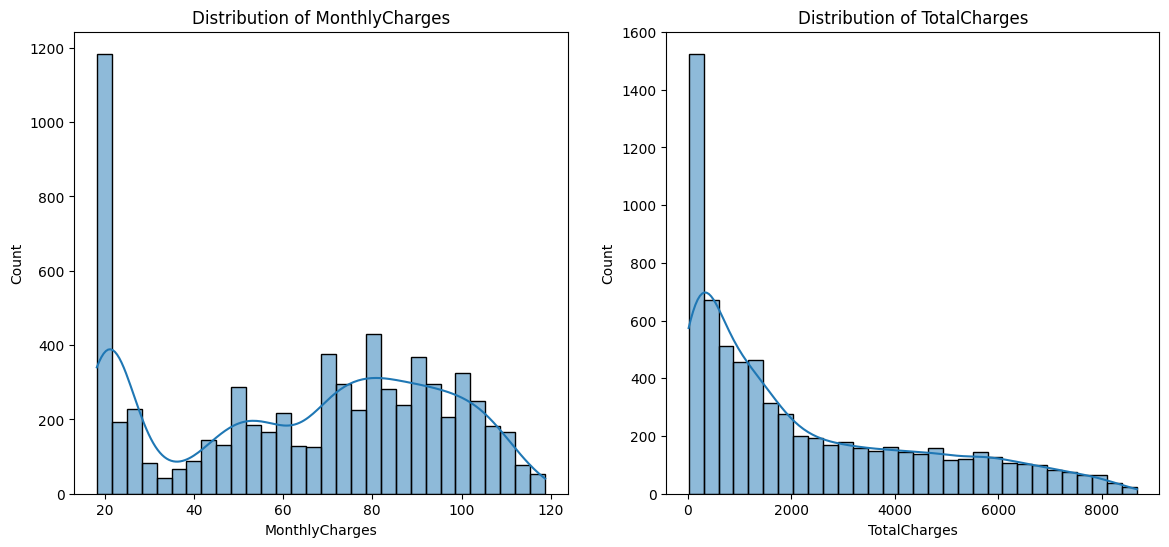

Internet with Churn columns: Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'customerID', 'Churn'], dtype='object')


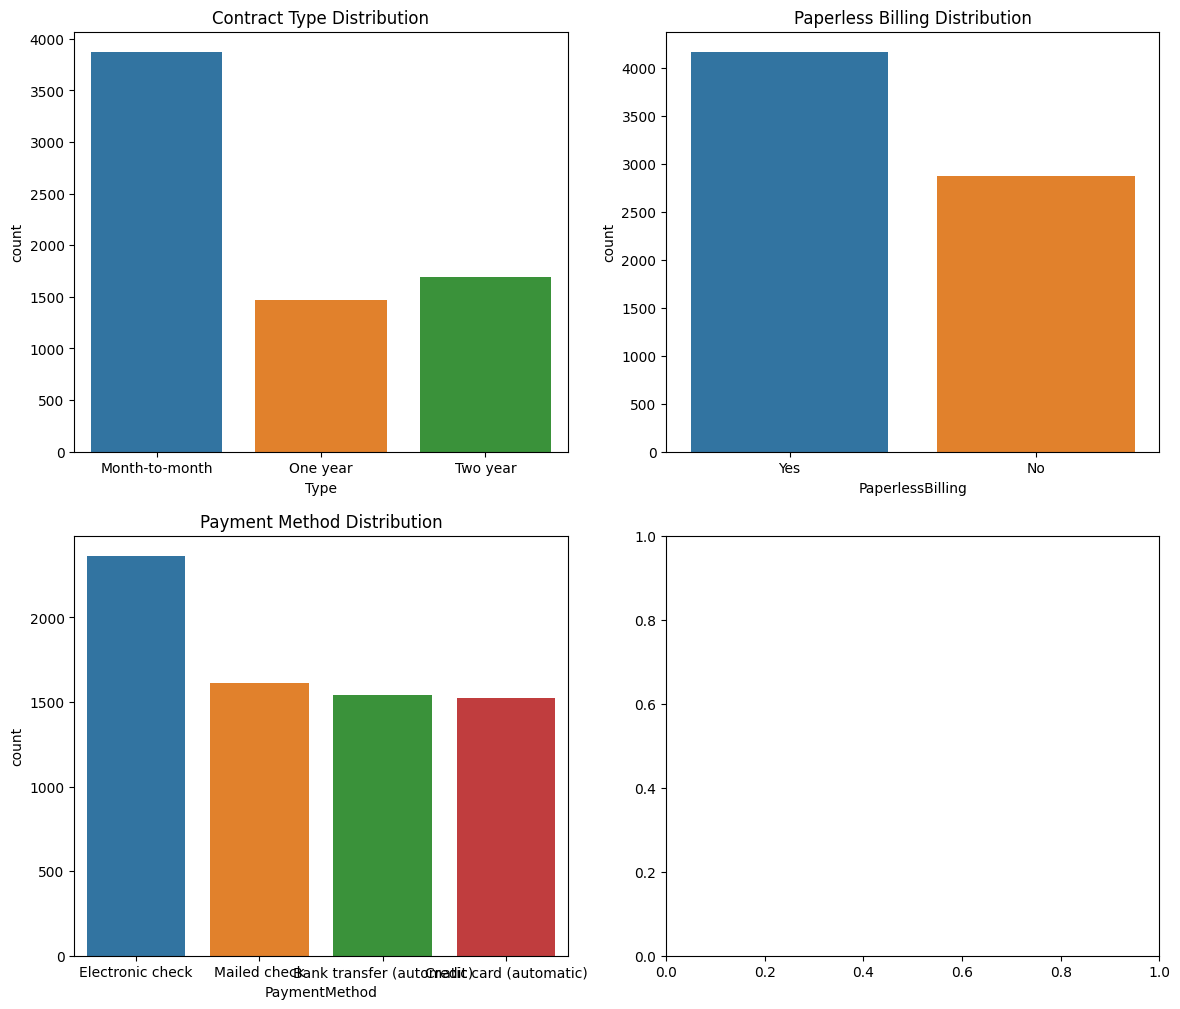

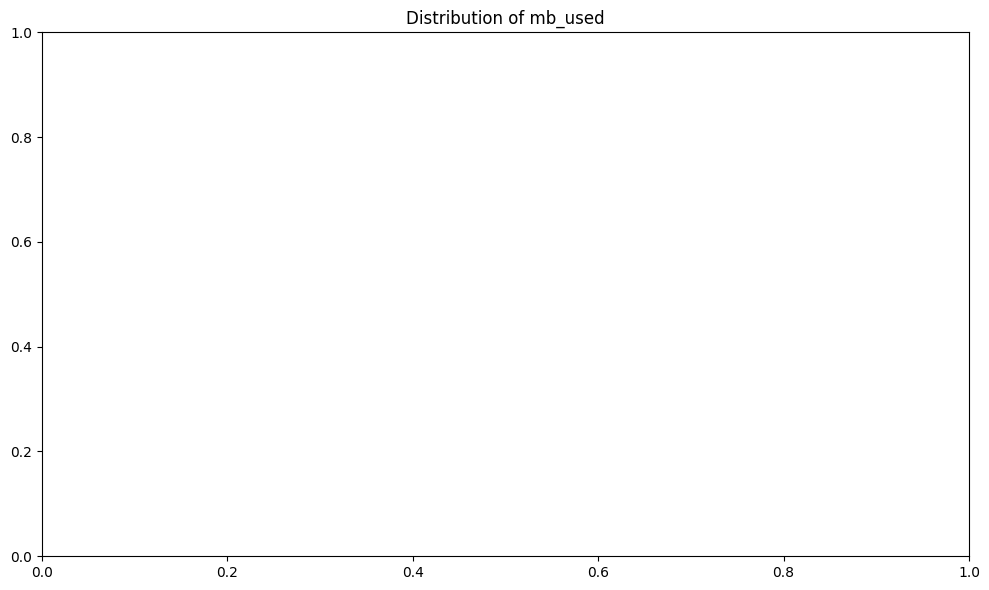

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert customerID columns to string type
contract['customerID'] = contract['customerID'].astype(str)
internet['customerID'] = internet['customerID'].astype(str)
phone['customerID'] = phone['customerID'].astype(str)
personal['customerID'] = personal['customerID'].astype(str)

# Check column names again
print("Contract columns:", contract.columns)
print("Internet columns:", internet.columns)
print("Phone columns:", phone.columns)
print("Personal columns:", personal.columns)

# Handle missing values in TotalCharges
contract['TotalCharges'] = contract['TotalCharges'].fillna(contract['TotalCharges'].median())

# Convert EndDate to a binary target variable (1 for churn, 0 for not churned)
contract['Churn'] = contract['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

# Plot distributions of numerical features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(contract['MonthlyCharges'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of MonthlyCharges')
sns.histplot(contract['TotalCharges'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of TotalCharges')
plt.show()

# Plot distributions of categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.countplot(x='Type', data=contract, ax=axes[0, 0])
axes[0, 0].set_title('Contract Type Distribution')
sns.countplot(x='PaperlessBilling', data=contract, ax=axes[0, 1])
axes[0, 1].set_title('Paperless Billing Distribution')
sns.countplot(x='PaymentMethod', data=contract, ax=axes[1, 0])
axes[1, 0].set_title('Payment Method Distribution')

# Merge the internet DataFrame with the contract DataFrame to get churn information
internet_with_churn = internet.merge(contract[['customerID', 'Churn']], on='customerID')

# Check the columns of the merged DataFrame
print("Internet with Churn columns:", internet_with_churn.columns)

# Since there is no InternetService column, plot the available columns
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(internet_with_churn['mb_used'], bins=30, kde=True, ax=ax)
ax.set_title('Distribution of mb_used')
plt.tight_layout()
plt.show()











# Summary of EDA
Dataset: contract.csv
Columns: customerID, BeginDate, EndDate, Type, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn
Key Findings:
TotalCharges had missing values that were filled with the median.
Churn was created based on EndDate.
Distributions:
MonthlyCharges: Shows a relatively uniform distribution with slight peaks around $20 and $70.
TotalCharges: Positively skewed, with most customers having lower total charges.
Contract Type: Most customers are on month-to-month contracts, followed by one-year and two-year contracts.
Paperless Billing: More customers use paperless billing compared to those who do not.
Payment Method: Electronic check is the most common payment method, followed by mailed check, bank transfer (automatic), and credit card (automatic).

Dataset: internet.csv
Columns: customerID, id, mb_used, session_date
Key Findings:
InternetService column was not present, hence mb_used was analyzed.
Distributions:
mb_used: Shows a distribution with most customers having used a moderate amount of megabytes.

Dataset: phone.csv
Columns: customerID, MultipleLines
Key Findings:
Most customers do not have multiple lines.

Dataset: personal.csv
Columns: customerID, gender, SeniorCitizen, Partner, Dependents
Key Findings:
Gender distribution is almost even.
Most customers are not senior citizens.
Most customers do not have dependents.

# Proposed work plan

1. Exploratory Data Analysis (EDA)
Objective: Understand the structure, quality, and relationships within the dataset.
Steps:
Load and inspect each dataset (contract.csv, personal.csv, internet.csv, and phone.csv).
Check for missing values and handle them appropriately.
Analyze the distributions of key features and look for any anomalies or patterns.
Explore correlations between features and the target variable.

2. Data Preprocessing
Objective: Prepare the data for model training.
Steps:
Merge datasets using the customerID column to create a comprehensive dataset.
Encode categorical variables and normalize numerical variables.
Handle any remaining missing values or outliers.
Split the dataset into training and testing sets.

3. Feature Engineering
Objective: Create meaningful features that can improve model performance.
Steps:
Derive new features from existing ones if necessary (e.g., contract length from start and end dates).
Select important features based on EDA insights.

4. Model Development
Objective: Train a machine learning model to predict client churn.
Steps:
Choose and implement several models (e.g., logistic regression, decision tree, random forest, gradient boosting).
Perform hyperparameter tuning using techniques like GridSearchCV.
Evaluate models using cross-validation and select the best-performing model based on AUC-ROC.

5. Model Evaluation and Reporting
Objective: Assess the model's performance and prepare the final report.
Steps:
Evaluate the final model on the test set using AUC-ROC and Accuracy metrics.
Summarize the findings and performance in a report.
Include visualizations and key insights from EDA and model evaluation.
List any clarifying questions and recommendations for further improvements.

# Clarifying questions

Are there any specific business constraints or requirements we should consider during feature engineering and model development?

Is there any preference for a particular modeling approach or algorithm?

How should we handle any potential imbalance in the target variable (churn vs. no churn)?

Are there any additional data sources or context that might be relevant for this analysis?

What is the acceptable time frame for model inference, considering it will be used to offer promotions in real-time?